In [3]:
#SVM
import random

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import classification_report



random.seed()

df = pd.read_csv('project_final.csv')
df['genre'] = np.where(df['genre']=="classical",0,np.where(df['genre']=="reggae",1,np.where(df['genre']=="blues",2,np.where(df['genre']=="pop",3,np.where(df['genre']=="hiphop",4,5)))))

independent_variables = df.drop('genre', axis=1)
x = independent_variables.values
y = df['genre'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = random.randrange(99999), shuffle = True)

svc = LinearSVC(max_iter=5000)
svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

print(svc)

print('Training Accuracy {}'.format(svc.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [0,1,2,3,4,5])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(svc.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [0,1,2,3,4,5])))
print(classification_report(y_test, y_pred_test))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=5000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Accuracy 0.7822222222222223
Training Confusion = [[80  2  5  0  0  0]
 [ 0 29  3  4  3  0]
 [ 0 11 52  0  4  5]
 [ 0 12  0 65  8  0]
 [ 1  9  1  4 51  2]
 [ 0  2 13  0  9 75]]
             precision    recall  f1-score   support

          0       0.92      0.99      0.95        81
          1       0.74      0.45      0.56        65
          2       0.72      0.70      0.71        74
          3       0.76      0.89      0.82        73
          4       0.75      0.68      0.71        75
          5       0.76      0.91      0.83        82

avg / total       0.78      0.78      0.77       450

Test Accuracy 0.7066666666666667
Test Confusion = [[19  1  3  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  6 18  0  2  1]
 [ 0  5  0 24  5  0]
 [ 0  9  1  3 14  0]
 [ 0  0  4  0  4 1

In [5]:
import matplotlib.pyplot as plt
cmap=plt.cm.Blues
import seaborn as sn


		  Training Data


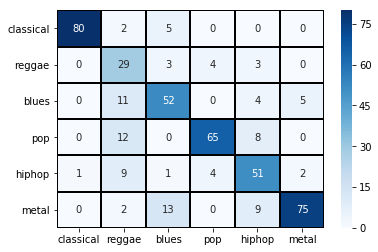

In [8]:
df_cm_test=metrics.confusion_matrix(y_pred_train, y_train, [0,1,2,3,4,5])
plot_labels=['classical','reggae','blues','pop','hiphop','metal']
print('\033[1m'+"\n\t\t  Training Data")
gra=sn.heatmap(df_cm_test,cmap=cmap,linecolor="#000000",linewidth=1,annot=True,xticklabels=plot_labels,yticklabels=plot_labels)


		  Testing Data


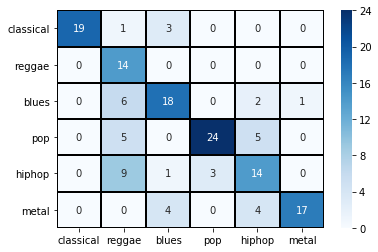

In [7]:
df_cm_test=metrics.confusion_matrix(y_pred_test, y_test, [0,1,2,3,4,5])
plot_labels=['classical','reggae','blues','pop','hiphop','metal']
print('\033[1m'+"\n\t\t  Testing Data")
gra=sn.heatmap(df_cm_test,cmap=cmap,linecolor="#000000",linewidth=1,annot=True,xticklabels=plot_labels,yticklabels=plot_labels)

In [16]:
#naivebayes
